# ATTN: This script should be run AFTER all embeddings are completed.


### START HERE IF SOURCING FROM df_manual_FOR_TRAINNING
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


# Descriptives and visualization


In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [3]:
def get_df_info(df, ivs_all=None):
    if ivs_all is None:
        ivs_all = [
            'Gender',
            'Gender_Num',
            'Gender_Female',
            'Gender_Mixed',
            'Gender_Male',
            'Gender_Female_n',
            'Gender_Male_n',
            'Gender_Female_% per Sector',
            'Gender_Male_% per Sector',
            'Age',
            'Age_Num',
            'Age_Older',
            'Age_Mixed',
            'Age_Younger',
            'Age_Older_n',
            'Age_Younger_n',
            'Age_Older_% per Sector',
            'Age_Younger_% per Sector',
        ]
    # Print Info
    print('\nDF INFO:\n')
    df.info()

    for iv in ivs_all:
        try:
            print('='*20)
            print(f'{iv}:')
            print('-'*20)
            if len(df[iv].value_counts()) < 5:
                print(f'{iv} Counts:\n{df[iv].value_counts()}')
                print('-'*20)
                print(f'{iv} Percentages:\n{df[iv].value_counts(normalize=True).mul(100).round(1).astype(float)}')
                print('-'*20)
            print(f'Min {iv} value: {df[iv].min()}')
            print(f'Max {iv} value: {df[iv].max()}')
            with contextlib.suppress(Exception):
                print('-'*20)
                print(f'{iv} Mean: {df[iv].mean().round(2).astype(float)}')
                print('-'*20)
                print(f'{iv} Standard Deviation: {df[iv].std().round(2).astype(float)}')
        except Exception:
            print(f'{iv} not available.')

    print('\n')


In [4]:
# Function to order categories
def categorize_df_gender_age(df, gender_order=None, age_order=None, ivs=None):
    if gender_order is None:
        gender_order = ['Female', 'Mixed Gender', 'Male']
    if age_order is None:
        age_order = ['Older', 'Mixed Age', 'Younger']
    if ivs is None:
        ivs = ['Gender', 'Age']
    # Arrange Categories
    for iv in ivs:
        if iv == 'Gender':
            order = gender_order
        elif iv == 'Age':
            order = age_order
        with contextlib.suppress(ValueError):
            df[iv] = df[iv].astype('category').cat.reorder_categories(order, ordered=True)

            df[iv] = pd.Categorical(
                df[iv], categories=order, ordered=True
            )
            df[f'{iv}_Num'] = pd.to_numeric(df[iv].cat.codes).astype('int64')

    return df


In [5]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_trainning.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')


Dataframe loaded with shape: (5978, 58)


In [6]:
with open(f'{data_dir}df_jobs_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_classification.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')


Dataframe loaded with shape: (187422, 69)


In [7]:
dataframes = {
    'df_manual': df_manual,
    'df_jobs': df_jobs,
}

In [8]:
# All info
analysis_columns = [
    'Warmth',
    'Competence'
]

for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    df = categorize_df_gender_age(df)

    df.info()


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 5977
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5978 non-null   object  
 1   Job Description spacy_sentencized                 5978 non-null   object  
 2   Warmth                                            5978 non-null   int64   
 3   Competence                                        5978 non-null   int64   
 4   Dutch Requirement                                 5978 non-null   object  
 5   English Requirement                               5978 non-null   object  
 6   Search Keyword                                    5978 non-null   object  
 7   Platform                                          5978 non-null   object  
 8   Job Title                          

In [9]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Sector info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=['% Sector per Workforce'])
    print('-'*30)

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Sector info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 5977
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5978 non-null   object  
 1   Job Description spacy_sentencized                 5978 non-null   object  
 2   Warmth                                            5978 non-null   int64   
 3   Competence                                        5978 non-null   int64   
 4   Dutch Requirement                                 5978 non-null   object  
 5   English Requirement                               5978 non-null   object  
 6   Search Keyword                                    5978 non-null   object  
 7   Platform                                   

In [10]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    min_sector = df['Sector'].loc[df['% Sector per Workforce'] == df['% Sector per Workforce'].min()].values[0]
    max_sector = df['Sector'].loc[df['% Sector per Workforce'] == df['% Sector per Workforce'].max()].values[0]
    mean = df['% Sector per Workforce'].mean().round(2).astype(float)
    std = df['% Sector per Workforce'].std().round(2).astype(float)
    print(f'"% Sector per Workforce":\nMin Sector: {df["% Sector per Workforce"].min():.1f}% in {min_sector}\nMax Sector: {df["% Sector per Workforce"].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
    print('-'*20)

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

"% Sector per Workforce":
Min Sector: 0.1% in Energy supply
Max Sector: 31.4% in Commercial services
Mean: 4.49
Standard Deviation: 5.32

--------------------
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

"% Sector per Workforce":
Min Sector: 0.1% in Energy supply
Max Sector: 31.4% in Commercial services
Mean: 5.59
Standard Deviation: 8.77

--------------------


In [11]:
# Gender and Age info by sentence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Gender and Age info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=ivs_all)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender and Age info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 5977
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5978 non-null   object  
 1   Job Description spacy_sentencized                 5978 non-null   object  
 2   Warmth                                            5978 non-null   int64   
 3   Competence                                        5978 non-null   int64   
 4   Dutch Requirement                                 5978 non-null   object  
 5   English Requirement                               5978 non-null   object  
 6   Search Keyword                                    5978 non-null   object  
 7   Platform                           

In [12]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    for iv_perc in ivs_perc:
        min_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].min()].values[0]
        max_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].max()].values[0]
        mean = df[iv_perc].mean().round(2).astype(float)
        std = df[iv_perc].std().round(2).astype(float)
        print(f'{iv_perc}:\nMin Sector: {df[iv_perc].min():.1f}% in {min_sector}\nMax Sector: {df[iv_perc].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
        print('-'*20)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender_Female_% per Sector:
Min Sector: 19.4% in Water supply and waste management
Max Sector: 84.3% in Health and social work activities
Mean: 45.19
Standard Deviation: 15.89

--------------------
Gender_Male_% per Sector:
Min Sector: 15.6% in Health and social work activities
Max Sector: 80.6% in Water supply and waste management
Mean: 54.79
Standard Deviation: 15.91

--------------------
Age_Older_% per Sector:
Min Sector: 18.9% in Accommodation and food serving
Max Sector: 58.3% in Water supply and waste management
Mean: 38.13
Standard Deviation: 8.74

--------------------
Age_Younger_% per Sector:
Min Sector: 44.4% in Water supply and waste management
Max Sector: 80.8% in Accommodation and food serving
Mean: 61.62
Standard Deviation: 8.82

--------------------
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

Gender_Female_% per Sector:
Min Sector: 12.5% in Construction
Max Sector: 84.3% in Health and social work activities
Mea

In [13]:
# Gender and Age info by job ad
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Gender and Age info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all=ivs_all)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender and Age info at Job Advertisement Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job Description spacy_sentencized                 117 non-null    object  
 1   Warmth                                            117 non-null    int64   
 2   Competence                                        117 non-null    int64   
 3   Dutch Requirement                                 117 non-null    object  
 4   English Requirement                               117 non-null    object  
 5   Search Keyword                                    117 non-null    object  
 6   Platform                                          117 non-null    object  
 7   Job Titl

In [14]:
# Warmth and Competence percentages info by sentence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_jobs':
        dvs = dvs_prob

    print('='*30)
    print('Warmth and Competence info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=dvs)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Warmth and Competence info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 5977
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5978 non-null   object  
 1   Job Description spacy_sentencized                 5978 non-null   object  
 2   Warmth                                            5978 non-null   int64   
 3   Competence                                        5978 non-null   int64   
 4   Dutch Requirement                                 5978 non-null   object  
 5   English Requirement                               5978 non-null   object  
 6   Search Keyword                                    5978 non-null   object  
 7   Platform                    

In [15]:
# Warmth and Competence info by job ad
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_jobs':
        dvs = dvs_prob

    print('='*30)
    print('Warmth and Competence info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all=dvs)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Warmth and Competence info at Job Advertisement Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job Description spacy_sentencized                 117 non-null    object  
 1   Warmth                                            117 non-null    int64   
 2   Competence                                        117 non-null    int64   
 3   Dutch Requirement                                 117 non-null    object  
 4   English Requirement                               117 non-null    object  
 5   Search Keyword                                    117 non-null    object  
 6   Platform                                          117 non-null    object  
 7   J

In [16]:
# Control variables info by sentence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Control varibales info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all = controls)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Control varibales info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 5977
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5978 non-null   object  
 1   Job Description spacy_sentencized                 5978 non-null   object  
 2   Warmth                                            5978 non-null   int64   
 3   Competence                                        5978 non-null   int64   
 4   Dutch Requirement                                 5978 non-null   object  
 5   English Requirement                               5978 non-null   object  
 6   Search Keyword                                    5978 non-null   object  
 7   Platform                        

In [17]:
# Control variables info by job ad
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Control varibales info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all = controls)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Control varibales info at Job Advertisement Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job Description spacy_sentencized                 117 non-null    object  
 1   Warmth                                            117 non-null    int64   
 2   Competence                                        117 non-null    int64   
 3   Dutch Requirement                                 117 non-null    object  
 4   English Requirement                               117 non-null    object  
 5   Search Keyword                                    117 non-null    object  
 6   Platform                                          117 non-null    object  
 7   Job T

In [18]:
# Imbalance Ratio
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    warmth_imbalance_ratio = df['Warmth'].loc[
        df['Warmth'] == 1].count()/df['Warmth'].loc[df['Warmth'] == 0
    ].count()
    competence_imbalance_ratio = df['Competence'].loc[
        df['Competence'] == 1].count()/df['Competence'].loc[df['Competence'] == 0
    ].count()

    all_imbalance_ratio_dict = {
        'Warmth': warmth_imbalance_ratio,
        'Competence': competence_imbalance_ratio
    }

    print('='*20)
    print('Imabalance Ratios')
    print('-'*10)
    print(f'Warmth IR: {warmth_imbalance_ratio:.2f}')
    print(f'Competence IR: {competence_imbalance_ratio:.2f}')
    print('='*20)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Imabalance Ratios
----------
Warmth IR: 0.34
Competence IR: 0.79
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:3802 in get_loc                                                                 │
│                                                                                                  │
│   3799 │   │   │   │   )                                                                         │
│   3800 │   │   │   casted_key = self._maybe_cast_indexer(key)                                    │
│   3801 │   │   │   try:                                                                          │
│ ❱ 3802 │   │   │   │   return self._engine.get_loc(casted_key)                                   │
│   3803 │   │   │   except KeyError as err:                                                       │
│   3804 │   │   │   │   raise KeyError(key) from err                                              │
│   3805 │   │   │   except TypeError:                                                             │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/index.pyx:138 in pandas._libs.index.IndexEngine.get_loc                    │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/index.pyx'                      │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/index.pyx:165 in pandas._libs.index.IndexEngine.get_loc                    │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/index.pyx'                      │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/hashtable_class_helper.pxi:5745 in                                         │
│ pandas._libs.hashtable.PyObjectHashTable.get_item                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/hashtable_class_helper.pxi'     │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/hashtable_class_helper.pxi:5753 in                                         │
│ pandas._libs.hashtable.PyObjectHashTable.get_item                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/hashtable_class_helper.pxi'     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Warmth'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ─────

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:3802 in get_loc                                                                 │
│                                                                                                  │
│   3799 │   │   │   │   )                                                                         │
│   3800 │   │   │   casted_key = self._maybe_cast_indexer(key)                                    │
│   3801 │   │   │   try:                                                                          │
│ ❱ 3802 │   │   │   │   return self._engine.get_loc(casted_key)                                   │
│   3803 │   │   │   except KeyError as err:                                                       │
│   3804 │   │   │   │   raise KeyError(key) from err                                              │
│   3805 │   │   │   except TypeError:                                                             │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/index.pyx:138 in pandas._libs.index.IndexEngine.get_loc                    │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/index.pyx'                      │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/index.pyx:165 in pandas._libs.index.IndexEngine.get_loc                    │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/index.pyx'                      │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/hashtable_class_helper.pxi:5745 in                                         │
│ pandas._libs.hashtable.PyObjectHashTable.get_item                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/hashtable_class_helper.pxi'     │
│                                                                                                  │
│ /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/3. Analysis and      │
│ Plotting/pandas/_libs/hashtable_class_helper.pxi:5753 in                                         │
│ pandas._libs.hashtable.PyObjectHashTable.get_item                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/Users/nyxinsane/Documents/Work - UvA/Automating           │
│ Equity/Study 1/Study1_Code/3. Analysis and Plotting/pandas/_libs/hashtable_class_helper.pxi'     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Warmth'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ─────

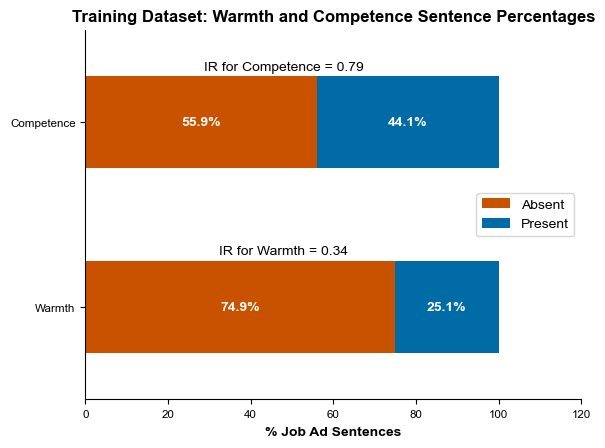

In [19]:
# Ploting Warmth and Competence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    dfs_to_transpose = [
        df['Warmth'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().T,
        df['Competence'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().T,
    ]
    if df_name == 'df_jobs':
        dfs_to_transpose.append(
            df['Warmth_Probability'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().T,
        )
        dfs_to_transpose.append(
            df['Competence_Probability'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().T,
        )

    df_warm_comp_transposed = pd.concat(dfs_to_transpose)

    fig, ax = plt.subplots()
    ax.set_title('Training Dataset: Warmth and Competence Sentence Percentages')
    ax.set_xlabel('Manually Annotated Sentencence Warmth and Competence Percentage from Total')

    df_warm_comp_transposed.plot(
        kind='barh', legend=True, stacked=True, ax=ax, color=['C5', 'C0'],
    )
    ax.legend(['Absent', 'Present'])

    for container in ax.containers:
        labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
        ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')
        ax.set_xlabel('% Job Ad Sentences')

    for i, tick_label in enumerate(ax.get_ymajorticklabels()):
        ax.annotate(
            f'IR for {tick_label.get_text()} = {all_imbalance_ratio_dict[tick_label.get_text()]:.2f}',
            xy=(48, 0.3+i), ha='center', va='center'
        )

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} Manually Annotated Warmth and Competence Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



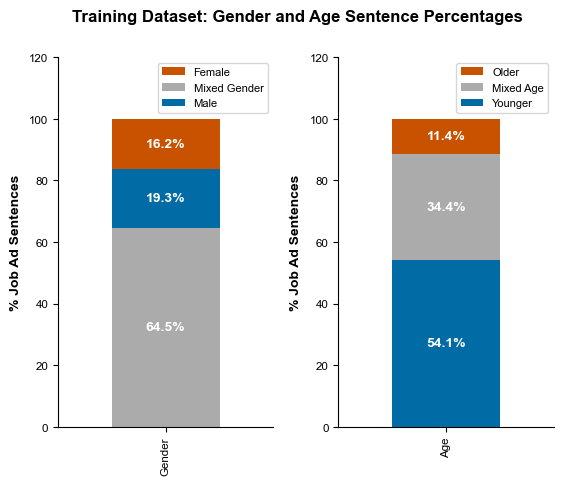

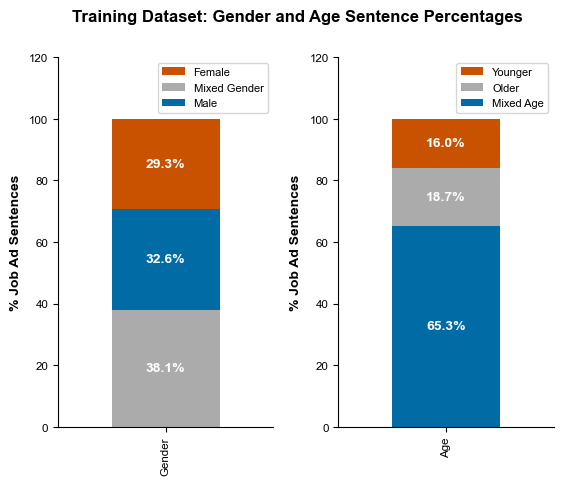

In [20]:
# Ploting Gender and Age
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    df_gender_transposed = df['Gender'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().T
    df_age_transposed = df['Age'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().T

    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Training Dataset: Gender and Age Sentence Percentages')

    df_gender_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[0], color=['C2', 'C0', 'C5']
    )
    df_age_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[1], color=['C0', 'C2', 'C5']
    )

    for ax in axs:
        for container in ax.containers:
            labels = [f'{height:.1f}%' for v in container if float(height:= v.get_height())]
            ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')
            ax.set_ylabel('% Job Ad Sentences')
            handles, labels = ax.get_legend_handles_labels()
            order = [2, 1, 0] if 'Older' in labels else [2, 0, 1]
            ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=8, )

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} Manually Annotated Gender and Age Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



  0%|          | 0/3 [00:00<?, ?it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/3527901319.py:10 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/3527901319.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /frame.py:3813 in __getitem__                                                                    │
│                                                                                                  │
│    3810 │   │   else:                                                                            │
│    3811 │   │   │   if is_iterator(key):                                                         │
│    3812 │   │   │   │   key = list(key)                                                          │
│ ❱  3813 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    3814 │   │                                                                                    │
│    3815 │   │   # take() does not accept boolean indexers                                        │
│    3816 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:6070 in _get_indexer_strict                                                     │
│                                                                                                  │
│   6067 │   │   else:                                                                             │
│   6068 │   │   │   keyarr, indexer, new_indexer = self._reindex_non_unique(keyarr)               │
│   6069 │   │                                                                                     │
│ ❱ 6070 │   │   self._raise_if_missing(keyarr, indexer, axis_name)                                │
│   6071 │   │                                                                                     │
│   6072 │   │   keyarr = self.take(indexer)                                                       │
│   6073 │   │   if isinstance(key, Index):                                                        │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:6133 in _raise_if_missing                                                       │
│                                                                                                  │
│   6130 │   │   │   │   raise KeyError(f"None of [{key}] are in the [{axis_name}]")               │
│   6131 │   │   │                                                                                 │
│   6132 │   │   │   not_found = list(ensure_index(key)[missing_mask.nonzero()[0]].unique())       │
│ ❱ 6133 │   │   │   raise KeyError(f"{not_found} not in index")                                   │
│   6134 │                                                                                         │
│   6135 │   @overload                                                                             │
│   6136 │   def _get_indexer_non_comparable(                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "['Warmth_Probability', 'Competence_Probability'] n

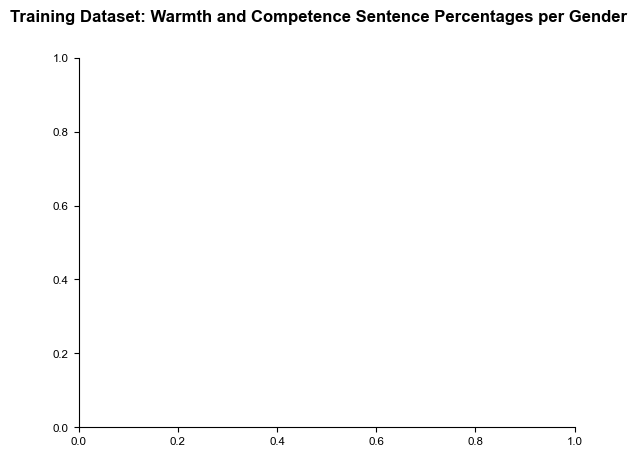

In [21]:
# Make stacked barplots with percentages
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    for iv in tqdm.tqdm(['Gender', 'Age', 'Sector']):
        fig, ax = plt.subplots()
        fig.suptitle(f'Training Dataset: Warmth and Competence Sentence Percentages per {iv}')

        vars_list = [iv, *dvs]
        df_pivot = df[
            vars_list
        ].pivot_table(
            index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
        )

        df_pivot.sort_values(by=iv, ascending=False).plot(kind='barh', legend=True, stacked=True, ax=ax, color=['C0', 'C5'])

        ax.legend(dvs)

        for container in ax.containers:
            labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
            if iv != 'Sector':
                ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=8)
            ax.set_xlabel('% Job Ad Sentences')
            ax.set_ylabel(iv)
            ax.legend(loc='upper right', fontsize=8)

        for image_save_format in ['eps', 'png', 'svg']:
            fig.savefig(
                f'{plot_save_path}{df_name} Barplot - Manually Annotated {iv} x {dvs[0]} and {dvs[1]} Sentences.{image_save_format}',
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )


In [22]:
def make_2ax_lineplot(ivs, dvs):
    line_plot = sns.lineplot(
        data=df.groupby(ivs[0])[dvs[0]].agg('mean').astype(float), marker='o', legend='full', ax=axs[0], color='C5'
    )
    line_plot = sns.lineplot(
        data=df.groupby(ivs[0])[dvs[1]].agg('mean').astype(float), marker='o', legend='full', ax=axs[0], color='C0'
    )
    line_plot = sns.lineplot(
        data=df.groupby(ivs[1])[dvs[0]].agg('mean').astype(float), marker='o', legend='full', ax=axs[1], color='C5'
    )
    line_plot = sns.lineplot(
        data=df.groupby(ivs[1])[dvs[1]].agg('mean').astype(float), marker='o', legend='full', ax=axs[1], color='C0'
    )

    fig.legend(dvs, fontsize=10)

    return line_plot


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/839242713.py:11 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/839242713.py'                  │
│                                                                                                  │
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/2444002748.py:3 in              │
│ make_2ax_lineplot                                                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/2444002748.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /groupby/generic.py:1416 in __getitem__                                                          │
│                                                                                                  │
│   1413 │   │   │   │   FutureWarning,                                                            │
│   1414 │   │   │   │   stacklevel=find_stack_level(),                                            │
│   1415 │   │   │   )                                                                             │
│ ❱ 1416 │   │   return super().__getitem__(key)                                                   │
│   1417 │                                                                                         │
│   1418 │   def _gotitem(self, key, ndim: int, subset=None):                                      │
│   1419 │   │   """                                                                               │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /base.py:248 in __getitem__                                                                      │
│                                                                                                  │
│    245 │   │                                                                                     │
│    246 │   │   else:                                                                             │
│    247 │   │   │   if key not in self.obj:                                                       │
│ ❱  248 │   │   │   │   raise KeyError(f"Column not found: {key}")                                │
│    249 │   │   │   subset = self.obj[key]                                                        │
│    250 │   │   │   ndim = subset.ndim                                                            │
│    251 │   │   │   return self._gotitem(key, ndim=ndim, subset=subset)                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Column not found: Warmth_Probability'

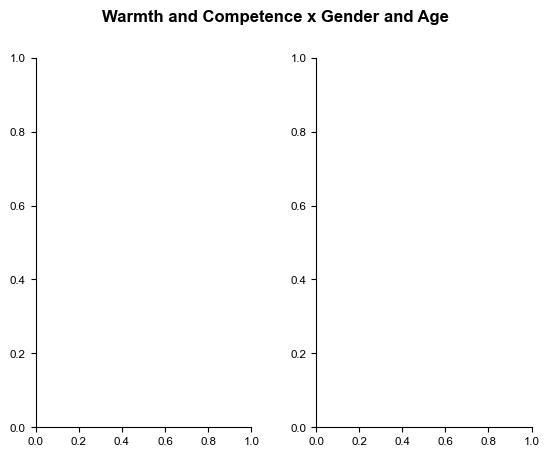

In [23]:
# Make line plots 2 ax
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_jobs':
        dvs = dvs_prob

    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Warmth and Competence x Gender and Age')

    line_plot = make_2ax_lineplot(ivs, dvs)

    # line_plot = sns.lineplot(
    #     data=df.groupby('Gender')['Warmth'].agg('mean').astype(float), marker='o', legend='full', ax=axs[0], color='C5'
    # )
    # line_plot = sns.lineplot(
    #     data=df.groupby('Gender')['Competence'].agg('mean').astype(float), marker='o', legend='full', ax=axs[0], color='C0'
    # )
    # line_plot = sns.lineplot(
    #     data=df.groupby('Age')['Warmth'].agg('mean').astype(float), marker='o', legend='full', ax=axs[1], color='C5'
    # )
    # line_plot = sns.lineplot(
    #     data=df.groupby('Age')['Competence'].agg('mean').astype(float), marker='o', legend='full', ax=axs[1], color='C0'
    # )

    # fig.legend(dvs, fontsize=10)

    fig = line_plot.get_figure()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} Line Plot (2 ax) - Manually Annotated Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [24]:
def make_4ax_lineplot(ivs, dvs):
    line_plot = sns.lineplot(
        data=df.groupby(ivs[0])['Warmth'].agg('mean').astype(float), marker='o', legend='full', ax=axs[0, 0], color='C5'
    )
    line_plot = sns.lineplot(
        data=df.groupby(ivs[0])['Competence'].agg('mean').astype(float), marker='o', legend='full', ax=axs[0, 1], color='C0'
    )
    line_plot = sns.lineplot(
        data=df.groupby(ivs[1])['Warmth'].agg('mean').astype(float), marker='o', legend='full', ax=axs[1, 0], color='C5'
    )
    line_plot = sns.lineplot(
        data=df.groupby(ivs[1])['Competence'].agg('mean').astype(float), marker='o', legend='full', ax=axs[1, 1], color='C0'
    )

    fig.legend(dvs, fontsize=10)

    return line_plot

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



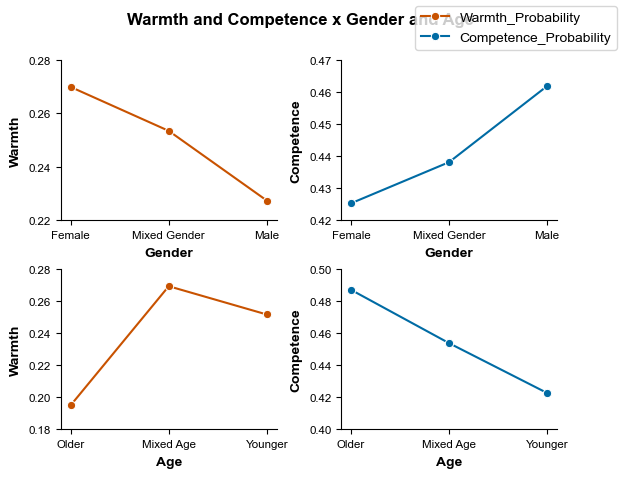

++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/1131675004.py:11 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/1131675004.py'                 │
│                                                                                                  │
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/2497796692.py:3 in              │
│ make_4ax_lineplot                                                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/2497796692.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /groupby/generic.py:1416 in __getitem__                                                          │
│                                                                                                  │
│   1413 │   │   │   │   FutureWarning,                                                            │
│   1414 │   │   │   │   stacklevel=find_stack_level(),                                            │
│   1415 │   │   │   )                                                                             │
│ ❱ 1416 │   │   return super().__getitem__(key)                                                   │
│   1417 │                                                                                         │
│   1418 │   def _gotitem(self, key, ndim: int, subset=None):                                      │
│   1419 │   │   """                                                                               │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /base.py:248 in __getitem__                                                                      │
│                                                                                                  │
│    245 │   │                                                                                     │
│    246 │   │   else:                                                                             │
│    247 │   │   │   if key not in self.obj:                                                       │
│ ❱  248 │   │   │   │   raise KeyError(f"Column not found: {key}")                                │
│    249 │   │   │   subset = self.obj[key]                                                        │
│    250 │   │   │   ndim = subset.ndim                                                            │
│    251 │   │   │   return self._gotitem(key, ndim=ndim, subset=subset)                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Column not found: Warmth'

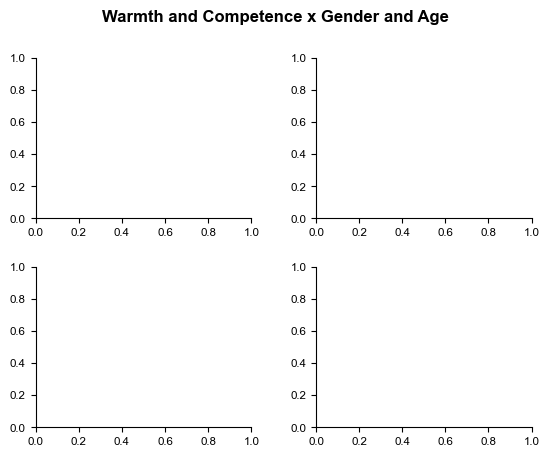

In [25]:
# Make line plots 4 ax
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_jobs':
        dvs = dvs_prob

    fig, axs = plt.subplots(2, 2)
    fig.suptitle('Warmth and Competence x Gender and Age')

    line_plot = make_4ax_lineplot(ivs, dvs)

    # line_plot = sns.lineplot(
    #     data=df.groupby('Gender')['Warmth'].agg('mean').astype(float), marker='o', legend='full', ax=axs[0, 0], color='C5'
    # )
    # line_plot = sns.lineplot(
    #     data=df.groupby('Gender')['Competence'].agg('mean').astype(float), marker='o', legend='full', ax=axs[0, 1], color='C0'
    # )
    # line_plot = sns.lineplot(
    #     data=df.groupby('Age')['Warmth'].agg('mean').astype(float), marker='o', legend='full', ax=axs[1, 0], color='C5'
    # )
    # line_plot = sns.lineplot(
    #     data=df.groupby('Age')['Competence'].agg('mean').astype(float), marker='o', legend='full', ax=axs[1, 1], color='C0'
    # )

    # fig.legend(dvs, fontsize=10)

    fig = line_plot.get_figure()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} Line Plot (4 ax) - Manually Annotated Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [26]:
def make_violin_plot(ivs, dvs):
    violin_plot = sns.violinplot(
        data=df, x='Gender', y='Warmth', palette=['C5', 'C2', 'C0'], inner='quartile', ax=axs[0, 0]
    )
    violin_plot = sns.violinplot(
        data=df, x='Gender', y='Competence', palette=['C5', 'C2', 'C0'], inner='quartile', ax=axs[0, 1]
    )
    violin_plot = sns.violinplot(
        data=df, x='Age', y='Warmth', palette=['C5', 'C2', 'C0'], inner='quartile', ax=axs[1, 0]
    )
    violin_plot = sns.violinplot(
        data=df, x='Age', y='Competence', palette=['C5', 'C2', 'C0'], inner='quartile', ax=axs[1, 1]
    )

    return violin_plot

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/2910712998.py:11 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/2910712998.py'                 │
│                                                                                                  │
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/4172338008.py:2 in              │
│ make_violin_plot                                                                                 │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/4172338008.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/seaborn/_de │
│ corators.py:46 in inner_f                                                                        │
│                                                                                                  │
│   43 │   │   │   │   FutureWarning                                                               │
│   44 │   │   │   )                                                                               │
│   45 │   │   kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})                     │
│ ❱ 46 │   │   return f(**kwargs)                                                                  │
│   47 │   return inner_f                                                                          │
│   48                                                                                             │
│   49                                                                                             │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/seaborn/cat │
│ egorical.py:2400 in violinplot                                                                   │
│                                                                                                  │
│   2397 │   ax=None, **kwargs,                                                                    │
│   2398 ):                                                                                        │
│   2399 │                                                                                         │
│ ❱ 2400 │   plotter = _ViolinPlotter(x, y, hue, data, order, hue_order,                           │
│   2401 │   │   │   │   │   │   │    bw, cut, scale, scale_hue, gridsize,                         │
│   2402 │   │   │   │   │   │   │    width, inner, split, dodge, orient, linewidth,               │
│   2403 │   │   │   │   │   │   │    color, palette, saturation)                                  │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/seaborn/cat │
│ egorical.py:522 in __init__                                                                      │
│                                                                                                  │
│    519 │   │   │   │    width, inner, split, dodge, orient, linewidth,                           │
│    520 │   │   │   │    color, palette, saturation):                                             │
│    521 │   │                                               

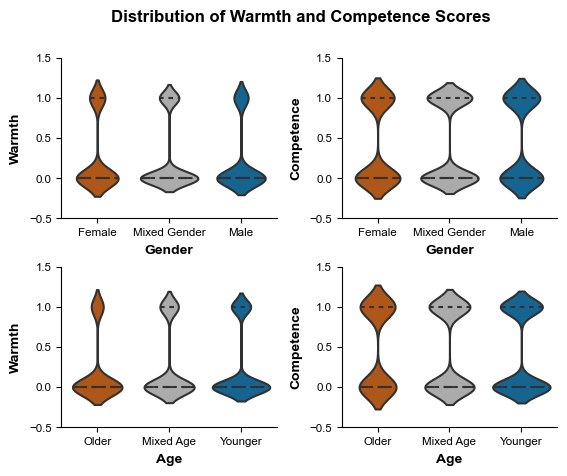

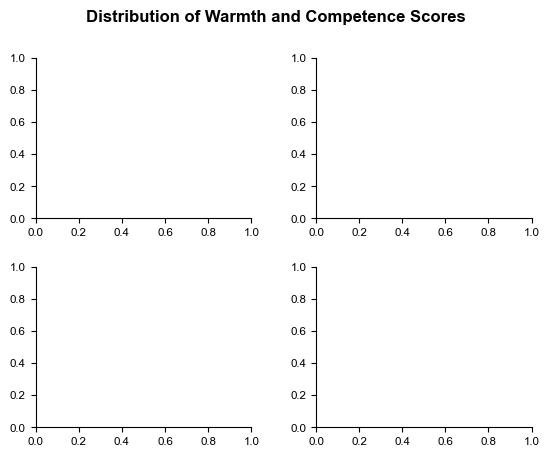

In [27]:
# Make violin plots
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_jobs':
        dvs = dvs_prob

    fig, axs = plt.subplots(2, 2)
    fig.suptitle('Distribution of Warmth and Competence Scores')

    violin_plot = make_violin_plot(ivs, dvs)

    # violin_plot = sns.violinplot(
    #     data=df, x='Gender', y='Warmth', palette=['C5', 'C0'], inner='quartile', color='C0', ax=axs[0, 0]
    # )
    # violin_plot = sns.violinplot(
    #     data=df, x='Gender', y='Competence', palette=['C5', 'C0'], inner='quartile', color='C0', ax=axs[0, 1]
    # )
    # violin_plot = sns.violinplot(
    #     data=df, x='Age', y='Warmth', palette=['C5', 'C0'], inner='quartile', color='C0', ax=axs[1, 0]
    # )
    # violin_plot = sns.violinplot(
    #     data=df, x='Age', y='Competence', palette=['C5', 'C0'], inner='quartile', color='C0', ax=axs[1, 1]
    # )

    fig = violin_plot.get_figure()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
                f'{plot_save_path}{df_name} Violin Plot - Manually Annotated Sentences.{image_save_format}',
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )


# ATTN: This script should be run AFTER all visualizations are completed.


### START HERE IF SOURCING FROM df_manual_FOR_TRAINNING
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


# Make descriptive tables


In [28]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [29]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [30]:
# Function to order categories
def categorize_df_gender_age(df, gender_order=None, age_order=None, ivs=None):
    if gender_order is None:
        gender_order = ['Female', 'Mixed Gender', 'Male']
    if age_order is None:
        age_order = ['Older', 'Mixed Age', 'Younger']
    if ivs is None:
        ivs = ['Gender', 'Age']
    # Arrange Categories
    for iv in ivs:
        if iv == 'Gender':
            order = gender_order
        elif iv == 'Age':
            order = age_order
        with contextlib.suppress(ValueError):
            df[iv] = df[iv].astype('category').cat.reorder_categories(order, ordered=True)

            df[iv] = pd.Categorical(
                df[iv], categories=order, ordered=True
            )
            df[f'{iv}_Num'] = pd.to_numeric(df[iv].cat.codes).astype('int64')

    return df


In [31]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_trainning.pkl')


### Gender and Age tables

In [32]:
df = df_manual.copy()
gender_order = ['Female', 'Male', 'Mixed Gender']
age_order = ['Older', 'Younger', 'Mixed Age']

ivs_dict = {'Gender': gender_order, 'Age': age_order}

df_desc_gender_dict = defaultdict(list)
df_desc_age_dict = defaultdict(list)

variables = ['Gender', 'Age']
levels = ['Job Advertisement', 'Sentence']
data_types = ['Manually Annotated', 'Collected']

for v, level, data_type in tqdm_product(
    variables, levels, data_types
):
    df = categorize_df_gender_age(df)

    if level.title() == 'Job Advertisement':
        level_df = df.groupby(['Job ID']).first()
    elif level.title() == 'Sentence':
        level_df = df

  0%|          | 0/8 [00:00<?, ?it/s]

In [33]:
# Function to make descriptives tables
def genage_make_descriptives_table(df, v, level, gender_order=None, age_order=None):

    if gender_order is None:
        gender_order = ['Female', 'Male', 'Mixed Gender']
    if age_order is None:
        age_order = ['Older', 'Younger', 'Mixed Age']
    
    ivs_dict = {'Gender': gender_order, 'Age': age_order}

    df = categorize_df_gender_age(df)

    if level.title() == 'Job Advertisement':
        level_df = df.groupby(['Job ID']).first()
    elif level.title() == 'Sentence':
        level_df = df
    else:
        raise AssertionError(f'Specified level {level} not in data.')

    if v in list(ivs_dict.keys()):
        cat_dict = ivs_dict
        index = [
            f'{v_cat}-dominated'
            if 'Mixed' not in v_cat
            else
            f'{"-".join(v_cat.split())}'
            for v_cat in cat_dict[v]
        ]
        caption = [
            f'{v}_{v_cat.split()[0]}'
            for v_cat in cat_dict[v]
        ]

    desc_dict = {
        'Sectors': index,
        'n': [
            level_df[v].value_counts()[v_cat]
            for v_cat in cat_dict[v]
        ],
        '%': [
            level_df[v].value_counts(normalize=True).mul(100).round(2).astype(float)[v_cat]
            for v_cat in cat_dict[v]
        ],
        'M': [
            level_df[caption].mean().round(2).astype(float)[i]
            for i in range(len(cat_dict[v]))
        ],
        'S.D.': [
            level_df[caption].std().round(2).astype(float)[i]
            for i in range(len(cat_dict[v]))
        ]
    }

    # Make DF from dict
    df_desc = pd.DataFrame(desc_dict)
    df_desc = df_desc.set_index('Sectors')

    return df_desc


In [34]:
df_desc_gender_dict = defaultdict(list)
df_desc_age_dict = defaultdict(list)

variables = ['Gender', 'Age']
levels = ['Job Advertisement', 'Sentence']
data_types = ['Manually Annotated', 'Collected']

for v, level, data_type in tqdm_product(
    variables, levels, data_types
):
    cols = [
        (f'{data_type.title()} Job Advertisements', v, level.title(), 'n'),
        (f'{data_type.title()} Job Advertisements', v, level.title(), '%'),
        (f'{data_type.title()} Job Advertisements', v, level.title(), 'M'),
        (f'{data_type.title()} Job Advertisements', v, level.title(), 'S.D.'),
    ]

    df_desc_genage = genage_make_descriptives_table(df=df_manual, v=v, level=level)

    df_desc_genage.columns = pd.MultiIndex.from_tuples(cols)

    if v == 'Gender':
        df_desc_gender_dict[data_type].append(df_desc_genage)
    elif v == 'Age':
        df_desc_age_dict[data_type].append(df_desc_genage)


  0%|          | 0/8 [00:00<?, ?it/s]

In [35]:
df_desc_genage_dict = defaultdict(list)

for df, data_type in tqdm_product(
    [df_desc_gender_dict, df_desc_age_dict],
    data_types,
):
    category = df[data_type][0].columns.get_level_values(level=1)[0]
    if df[data_type][0].columns.get_level_values(level=2).str.contains('Job Advertisement').all():
        df_desc_genage_dict[category].append(
            pd.concat(
                [
                    df[data_type][0], df[data_type][1]
                ],
                axis='columns'
            )
        )
    else:
        df_desc_genage_dict[category].append(
            pd.concat(
                [
                    df[data_type][1], df[data_type][0]
                ],
                axis='columns'
            )
        )


  0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
for cat, df in df_desc_genage_dict.items():
    df = pd.concat([df[0], df[1]], axis='columns')

    if cat == 'Gender':
        df_desc_gender = df
    elif cat == 'Age':
        df_desc_age = df


In [37]:
# Save Tables
# Gender
df_desc_gender.to_csv(f'{table_save_path}Gender - Job Advertisement Descriptives.csv', index=True)
df_desc_gender.to_pickle(f'{table_save_path}Gender - Job Advertisement Descriptives.pkl')
with pd.option_context('max_colwidth', 10000000000):
    df_desc_gender.to_latex(f'{table_save_path}Gender - Job Advertisement Descriptives.tex', index=True, longtable=True, escape=True, multicolumn=True, multicolumn_format='c', position='H', caption='Number and proportion of job advertisements sample, and resulting sentences for gender and age homogeneous and heterogeneous sectors', label='Descriptives')
df_desc_gender.to_markdown(f'{table_save_path}Gender - Job Advertisement Descriptives.md', index=True)
# save_sector_excel(df_sectors_all, data_save_dir)

# Age
df_desc_age.to_csv(f'{table_save_path}Age - Job Advertisement Descriptives.csv', index=True)
df_desc_age.to_pickle(f'{table_save_path}Age - Job Advertisement Descriptives.pkl')
with pd.option_context('max_colwidth', 10000000000):
    df_desc_age.to_latex(f'{table_save_path}Age - Job Advertisement Descriptives.tex', index=True, longtable=True, escape=True, multicolumn=True, multicolumn_format='c', position='H', caption='Number and proportion of job advertisements sample, and resulting sentences for gender and age homogeneous and heterogeneous sectors', label='Descriptives')
df_desc_age.to_markdown(f'{table_save_path}Age - Job Advertisement Descriptives.md', index=True)
# save_sector_excel(df_sectors_all, data_save_dir)


/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/935172968.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_desc_gender.to_latex(f'{table_save_path}Gender - Job Advertisement Descriptives.tex', index=True, longtable=True, escape=True, multicolumn=True, multicolumn_format='c', position='H', caption='Number and proportion of job advertisements sample, and resulting sentences for gender and age homogeneous and heterogeneous sectors', label='Descriptives')
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/935172968.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature m

### Warmth and Competence tables


In [38]:
variables = ['Warmth', 'Competence']

cols = [
    ('Manually Annotated Job Advertisements', 'n'),
    ('Manually Annotated Job Advertisements', '%'),
    ('Manually Annotated Job Advertisements', 'M'),
    ('Manually Annotated Job Advertisements', 'S.D.'),
]

binary_order = [0, 1]
cat_dict = {'Warmth': binary_order, 'Competence': binary_order}

desc_warmcomp_dict = {
    'Frames': list(cat_dict.keys()),
    'n': [
        df_manual[v].value_counts()[1]
        for v in variables
    ],
    '%': [
        df_manual[v].value_counts(normalize=True).mul(100).round(2).astype(float)[1]
        for v in variables
    ],
    'M': list(
        df_manual[variables].mean().round(2).astype(float)
    ),
    'S.D.': list(
        df_manual[variables].std().round(2).astype(float)
    )
}
    
# Make df_manual from dict
df_desc_warmcomp = pd.DataFrame(desc_warmcomp_dict)
df_desc_warmcomp = df_desc_warmcomp.set_index('Frames')
df_desc_warmcomp.columns = pd.MultiIndex.from_tuples(cols)


In [39]:
# Save Tables
df_desc_warmcomp.to_csv(f'{table_save_path}Warmth and Competence - Job Advertisement Descriptives.csv', index=True)
df_desc_warmcomp.to_pickle(f'{table_save_path}Warmth and Competence - Job Advertisement Descriptives.pkl')
with pd.option_context('max_colwidth', 10000000000):
    df_desc_warmcomp.to_latex(f'{table_save_path}Warmth and Competence - Job Advertisement Descriptives.tex', index=True, longtable=True, escape=True, multicolumn=True, multicolumn_format='c', position='H', caption='Number and proportion of job advertisements sample, and resulting sentences for gender and age homogeneous and heterogeneous sectors', label='Descriptives')
df_desc_warmcomp.to_markdown(f'{table_save_path}Warmth and Competence - Job Advertisement Descriptives.md', index=True)
# save_sector_excel(df_sectors_all, data_save_dir)


/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_19780/772838686.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_desc_warmcomp.to_latex(f'{table_save_path}Warmth and Competence - Job Advertisement Descriptives.tex', index=True, longtable=True, escape=True, multicolumn=True, multicolumn_format='c', position='H', caption='Number and proportion of job advertisements sample, and resulting sentences for gender and age homogeneous and heterogeneous sectors', label='Descriptives')
